In [94]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [95]:
def f(x):
    return -2*x*x + 3.5*x -1.0

In [144]:
class fmodel(nn.Module):   
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=1,out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100,out_features=1),
            )
        
    def forward(self, x):
        return self.model(x)

In [145]:
class CustomDataset(Dataset):
    def __init__(self, n=200000):
        x = torch.rand(n,1)
        self.data = [x, f(x)]
        
    def __len__(self):
        return len(self.data[0])

    def __getitem__(self, idx):
        return self.data[0][idx], self.data[1][idx]

In [146]:
training_data = CustomDataset(200000)

In [147]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [148]:
model = fmodel()

In [149]:
loss_fn = nn.MSELoss()

In [150]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [151]:
def train_loop(train_dataloader, model, loss_fn, optimizer):
    size = len(train_dataloader.dataset)
    print(size)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 500 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [152]:
train_loop(train_dataloader, model, loss_fn, optimizer)

200000
loss: 0.347937  [   64/200000]
loss: 0.000502  [32064/200000]
loss: 0.000069  [64064/200000]
loss: 0.000019  [96064/200000]
loss: 0.000017  [128064/200000]
loss: 0.000008  [160064/200000]
loss: 0.000008  [192064/200000]


In [153]:
x = torch.rand(10,1)

In [154]:
y = f(x)
y_pred = model(x)

In [155]:
import matplotlib.pylab as plt

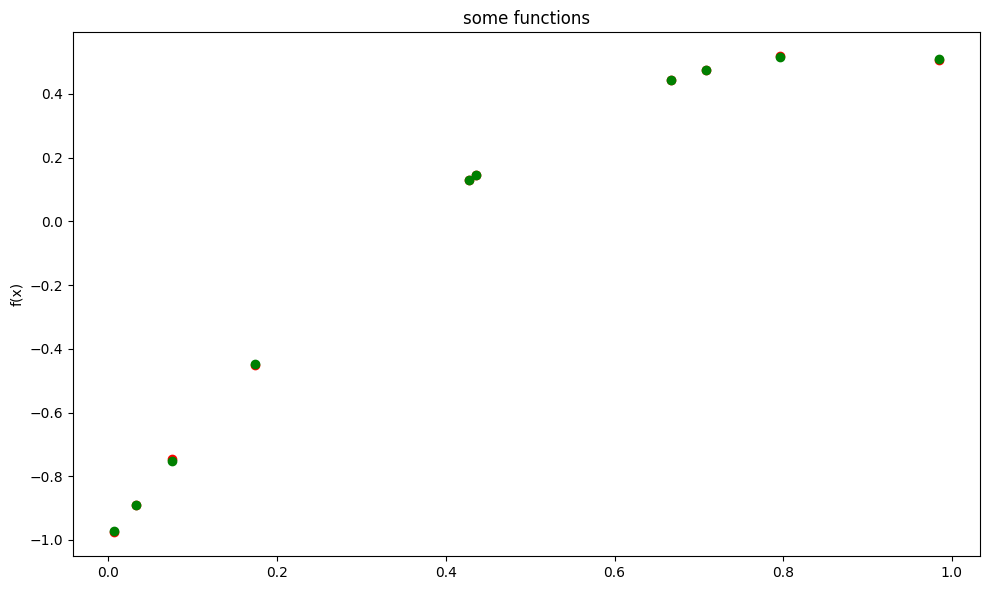

In [156]:
# Stack vertically
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,6))

# plots
ax.plot(x, y,'ro')
ax.plot(x, y_pred.detach(),'go')

# labels
ax.set_ylabel('f(x)')
ax.set_title('some functions')
    
# figure settings
fig.tight_layout() # adjusts spacing between subplots